In [1]:
import requests
import json
import pandas as pd
from getpass import getpass
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import os
from getpass import getpass
import geopandas as gpd
from cartoframes.viz import Map, Layer, popup_element
from dotenv import load_dotenv
import time
from pymongo import MongoClient

In [2]:
client = MongoClient("localhost:27017")

In [3]:
db = client["ironhack"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ironhack')

In [4]:
db.list_collection_names()

['nyneigh', 'nyrest', 'companies', 'restaurants']

In [5]:
c = db.get_collection("companies")

In [6]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [7]:
category = c.distinct("category_code")
print(category)

[None, 'advertising', 'analytics', 'automotive', 'biotech', 'cleantech', 'consulting', 'design', 'ecommerce', 'education', 'enterprise', 'fashion', 'finance', 'games_video', 'government', 'hardware', 'health', 'hospitality', 'legal', 'local', 'manufacturing', 'medical', 'messaging', 'mobile', 'music', 'nanotech', 'network_hosting', 'news', 'nonprofit', 'other', 'photo_video', 'public_relations', 'real_estate', 'search', 'security', 'semiconductor', 'social', 'software', 'sports', 'transportation', 'travel', 'web']


In [8]:
filter = {"category_code":{"$regex": "ecommerce|games_video|hardware|analytics|design|mobile|software|web"}}
filter_2 = {"offices.country_code": "DEU"}
projection = {"name": 1, "_id": 0, "category_code":1, "total_money_raised": 1, "offices.city":1, "offices.country_code": 1}
comp= list(c.find({
    '$and':
    [filter, filter_2]},projection).sort("total_money_raised", -1))
comp

[{'name': 'Karo Internet',
  'category_code': 'games_video',
  'total_money_raised': '€850k',
  'offices': [{'city': 'Cologne', 'country_code': 'DEU'}]},
 {'name': 'kinkon',
  'category_code': 'web',
  'total_money_raised': '€750k',
  'offices': [{'city': 'Kaiserslautern', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'RODECO ICT Services',
  'category_code': 'web',
  'total_money_raised': '€600k',
  'offices': [{'city': 'Boskoop', 'country_code': 'NLD'},
   {'city': 'Frankfurt am Main', 'country_code': 'DEU'},
   {'city': 'Bucharest', 'country_code': 'ROM'}]},
 {'name': 'zweitgeist',
  'category_code': 'web',
  'total_money_raised': '€500k',
  'offices': [{'city': 'Hamburg', 'country_code': 'DEU'}]},
 {'name': 'Transins

In [9]:
offices_ = comp[0]["offices"][0]["city"]
offices_

'Cologne'

In [10]:
cities = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        cities.append(comp[i]["offices"][j]["city"])

In [11]:
country = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        country.append(comp[i]["offices"][j]["country_code"])

In [12]:
df = pd.DataFrame(comp)
#df.drop(columns=["offices"],inplace=True)

In [13]:
df

,name,category_code,total_money_raised,offices
0,Karo Internet,games_video,€850k,"[{'city': 'Cologne', 'country_code': 'DEU'}]"
1,kinkon,web,€750k,"[{'city': 'Kaiserslautern', 'country_code': 'D..."
2,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
3,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
4,RODECO ICT Services,web,€600k,"[{'city': 'Boskoop', 'country_code': 'NLD'}, {..."
...,...,...,...,...
229,Cogniance,software,$0,"[{'city': 'Menlo Park', 'country_code': 'GBR'}..."
230,Pro2col,software,$0,"[{'city': 'Bournemouth', 'country_code': 'GBR'..."
231,Sevenval,mobile,$0,"[{'city': 'berlin', 'country_code': 'DEU'}]"
232,Sauspiel,games_video,$0,"[{'city': 'Berlin', 'country_code': 'DEU'}]"


In [14]:
df2 = pd.DataFrame(cities)
df2

,0
0,Cologne
1,Kaiserslautern
2,Munich
3,Munich
4,Boskoop
...,...
513,"Cheltenham, Glos"
514,Mannheim
515,berlin
516,Berlin


In [15]:
df2 = df2[df2[0].isin(["Berlin", "Hamburg", "Munich"])]

In [16]:
df2 = df2.groupby(0).size().reset_index(name="count")

In [17]:
df2

,0,count
0,Berlin,61
1,Hamburg,24
2,Munich,32


In [18]:
df2=df2.rename(columns={0: "cities"})

In [19]:
df2['tech_companies_per_km2'] = 0
df2.loc[df2['cities'] == 'Berlin', 'tech_companies_per_km2'] = df2['count'][0] / 891.8
df2.loc[df2['cities'] == 'Hamburg', 'tech_companies_per_km2'] = df2['count'][1] / 755.2
df2.loc[df2['cities'] == 'Munich', 'tech_companies_per_km2'] = df2['count'][2] / 310.7

In [20]:
df2=df2.rename(columns={"count": "tech companies per city"})


In [21]:
df2=df2.rename(columns={"tech_companies_per_km2": "tech companies per km2"})

In [22]:
square_berlin = 891,8
square_hamburg = 755,2
square_munich = 310,7

In [23]:
df2

,cities,tech companies per city,tech companies per km2
0,Berlin,61,0.068401
1,Hamburg,24,0.031780
2,Munich,32,0.102993


In [24]:
import matplotlib.pyplot as plt

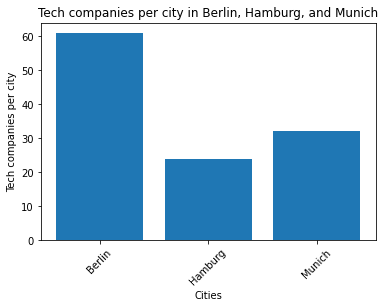

In [25]:
plt.bar(df2['cities'], df2['tech companies per city'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per city')
plt.title('Tech companies per city in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

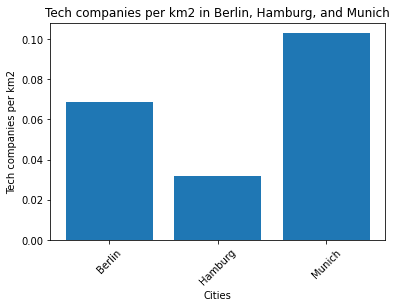

In [26]:
plt.bar(df2['cities'], df2['tech companies per km2'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per km2')
plt.title('Tech companies per km2 in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

### **Despite the fact that, according to "companies DataFrame," Berlin has the majority of tech companies, Münich has more companies per square kilometer, which may make the task of finding a suitable location for our tech company easier.**

In [27]:
# Now we use Foursquare API to find a proper location for our company in Munich

In [28]:
load_dotenv()

True

In [29]:
from getpass import getpass

In [31]:
token = getpass()

In [32]:
where = "Munich, Bayern"

In [33]:
url_geocode = f"https://geocode.xyz/{where}?json=1"
url_geocode

'https://geocode.xyz/Munich, Bayern?json=1'

In [37]:
url = "https://api.foursquare.com/v3/places/search?query=tech&ll=48.14016%2C11.55921&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response = requests.get(url, headers=headers)


response

<Response [200]>

In [38]:
#48.14016, 11.55921

In [39]:
len(response.json()["results"])

50

In [40]:
response.json()["results"][0]

{'fsq_id': '4ec0cc53f7907411613ab441',
 'categories': [{'id': 11167,
   'name': 'Technology Business',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/technology_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 220,
 'geocodes': {'main': {'latitude': 48.138899, 'longitude': 11.561686},
  'roof': {'latitude': 48.138899, 'longitude': 11.561686}},
 'link': '/v3/places/4ec0cc53f7907411613ab441',
 'location': {'address': 'Bayerstraße 21',
  'country': 'DE',
  'cross_street': '',
  'formatted_address': 'Bayerstraße 21, 83620 München',
  'locality': 'Munich',
  'postcode': '83620',
  'region': 'Bavaria'},
 'name': 'circ IT GmbH MUC',
 'related_places': {},
 'timezone': 'Europe/Berlin'}

In [41]:
coordinates = response.json()["results"][0]["geocodes"]["main"]
coordinates

{'latitude': 48.138899, 'longitude': 11.561686}

In [42]:
lat, lon = coordinates["latitude"], coordinates["longitude"]

In [43]:
name = response.json()["results"][0]["name"]
name

'circ IT GmbH MUC'

In [44]:
def name_coordinates (dict_):
    
    processed_dict = {"name": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [45]:
name_coordinates (response.json()["results"][0])

{'name': 'circ IT GmbH MUC', 'lat': 48.138899, 'lon': 11.561686}

In [47]:
new_list = []
for i in response.json()["results"]:
    new_list.append(name_coordinates(i))


In [48]:
df_munich_tech = pd.DataFrame(new_list)
df_munich_tech

,name,lat,lon
0,circ IT GmbH MUC,48.138899,11.561686
1,grassgreenmedia GmbH,48.136649,11.558795
2,InterNations GmbH,48.137307,11.559025
3,DataLion GmbH,48.138522,11.567189
4,AMA - App Marketing Agentur,48.135875,11.559834
5,Peakzone,48.137778,11.564451
6,Videri Concept GmbH,48.136594,11.567801
7,MessengerPeople,48.133614,11.556122
8,Voycer,48.135406,11.571782
9,Criteo,48.133084,11.570736


In [51]:
url_1 = "https://api.foursquare.com/v3/places/search?query=kindergarten&ll=48.14016%2C11.55921&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response_1 = requests.get(url_1, headers=headers)
response_1

<Response [200]>

In [52]:
response_1.json()

{'results': [{'fsq_id': '5027b2e2e4b0ca628a302d9d',
   'categories': [{'id': 12055,
     'name': 'Nursery School',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 2395,
   'geocodes': {'main': {'latitude': 48.155722, 'longitude': 11.581297},
    'roof': {'latitude': 48.155722, 'longitude': 11.581297}},
   'link': '/v3/places/5027b2e2e4b0ca628a302d9d',
   'location': {'address': 'Leopoldstraße 11c',
    'country': 'DE',
    'cross_street': '',
    'formatted_address': 'Leopoldstraße 11c, München',
    'locality': 'Munich',
    'region': 'Bavaria'},
   'name': 'Uni Kindergarten',
   'related_places': {},
   'timezone': 'Europe/Berlin'},
  {'fsq_id': '52b86c86498e15b4740f69bb',
   'categories': [{'id': 12055,
     'name': 'Nursery School',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 1319,
   'geocode

In [53]:
coordinates_1 = response.json()["results"][0]["geocodes"]["main"]
coordinates_1

{'latitude': 48.138899, 'longitude': 11.561686}

In [54]:
lat_1, lon_1 = coordinates["latitude"], coordinates["longitude"]

In [55]:
name_1 = response_1.json()["results"][0]["name"]
name_1

'Uni Kindergarten'

In [56]:
def name_coordinates (dict_):
    
    processed_dict = {"Kinder Garden": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [57]:
name_coordinates (response_1.json()["results"][0])

{'Kinder Garden': 'Uni Kindergarten', 'lat': 48.155722, 'lon': 11.581297}

In [58]:
new_list_1 = []
for i in response_1.json()["results"]:
    new_list_1.append(name_coordinates(i))

In [59]:
df_kinderg = pd.DataFrame(new_list_1)
df_kinderg

,Kinder Garden,lat,lon
0,Uni Kindergarten,48.155722,11.581297
1,Münchner Kindl - pme FamilienService,48.137160,11.576557
2,Kinderhaus St. Benedikt,48.139154,11.541435
3,Kinderhaus Lummerland,48.136595,11.541131
4,Kinderhaus Medienfabrik,48.130498,11.536679
5,Salberghaus Kinderkrippe Sonnenwelt,48.122813,11.544507
6,Kinderhaus Königskinder,48.117334,11.551955
7,Eltern-Initiative Die Murmeltiere,48.121984,11.535417
8,Privatkindergarten Christina Mahn,48.163267,11.585061
9,Villa Kunterbunt,48.129523,11.605034


In [60]:

url_2 = "https://api.foursquare.com/v3/places/search?query=Vegan%20essen&ll=48.14016%2C11.559211&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3eNrtoknw+NGSx9PZdGz9sArzHk5pYw8A0+Z1xip6xjU="
}

response_2 = requests.get(url_2, headers=headers)

In [61]:
response_2.json()
coordinates_2 = response_2.json()["results"][0]["geocodes"]["main"]
coordinates_2

{'latitude': 48.150562, 'longitude': 11.464121}

In [62]:
name_2 = response_2.json()["results"][0]["name"]
name_coordinates (response_2.json()["results"][0])

{'Kinder Garden': 'Essence Restaurant & Lounge',
 'lat': 48.150562,
 'lon': 11.464121}

In [63]:
def name_coordinates_2 (dict_):
    
    processed_dict = {"Vegan Restaurants": dict_["name"],
                     "lat": dict_["geocodes"]["main"]["latitude"],
                     "lon": dict_["geocodes"]["main"]["longitude"]}
    
    return processed_dict

In [64]:
name_coordinates_2 (response_2.json()["results"][0])
new_list_2 = []
for i in response_2.json()["results"]:
    new_list_2.append(name_coordinates_2(i))

In [65]:
df_veganr = pd.DataFrame(new_list_2)
df_veganr

,Vegan Restaurants,lat,lon
0,Essence Restaurant & Lounge,48.150562,11.464121
1,Veganista,48.146464,11.570527
2,Schöner Essen Interior e.K.,48.136315,11.575280
3,Soy Vegan München,48.151992,11.560691
4,Charly's vegan,48.151681,11.580758
5,Veganos,48.159765,11.566550
6,Vegan Junkhouse Club,48.130384,11.595543
7,Einstein Koscher Essen und Trinken,48.134713,11.571797
8,Essensimpulse,48.129448,11.557472
9,Euro PRISA TMW Essen GmbH,48.143313,11.575365


In [91]:
#munich_map = folium.Map(location=[48.13743, 11.57549], zoom_start=13)


### **I create a HeatMap to observe where the majority of vegan restaurants and Tech companies are located in the city.**

In [94]:
munich_map = folium.Map(location=[48.13743, 11.57549], zoom_start=13)

vegan_munich = folium.FeatureGroup(name=f"df_veganr({df_veganr.shape[0]})")
tech_munich = folium.FeatureGroup(name=f"df_munich_tech({df_munich_tech.shape[0]})")
kinderg_munich = folium.FeatureGroup(name=f"df_kinderg({df_kinderg.shape[0]})")



HeatMap(data = df_veganr[["lat", "lon"]],
radius=25,
gradient = {0.4: "yellow", 0.65: "orange", 1: "white"}
).add_to(vegan_munich)

HeatMap(data = df_munich_tech[["lat", "lon"]],
radius=25,
gradient = {0.4: "blue", 0.65: "purple", 1: "red"}
).add_to(tech_munich)

HeatMap(data = df_kinderg[["lat", "lon"]],
radius=25,
gradient = {0.4: "lightgreen", 0.65: "green", 1: "darkgreen"}
).add_to(kinderg_munich)

vegan_munich.add_to(munich_map)
tech_munich.add_to(munich_map)
kinderg_munich.add_to(munich_map)


folium.LayerControl(collapsed=False, position="topleft").add_to(munich_map)
munich_map